<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_7_Anomaly_Detection_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Assignment 7: Anomaly Detection Techniques
# Upload NSL-KDD Dataset
# Uploading the files manually
from google.colab import files
uploaded = files.upload()

Saving KDDTest+.zip to KDDTest+ (1).zip


In [7]:
# Unzipping the uploaded Dataset
!unzip KDDTest+.zip

Archive:  KDDTest+.zip
  inflating: KDDTest+.txt            
  inflating: KDDTrain+.txt           


In [8]:
# Loading the Dataset
import pandas as pd

# The column names from NSL-KDD documentation
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
"urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
"count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
"dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
"label","difficulty"]

train = pd.read_csv("KDDTrain+.txt", names=columns)
test = pd.read_csv("KDDTest+.txt", names=columns)

print(train.shape, test.shape)

(125973, 43) (22544, 43)


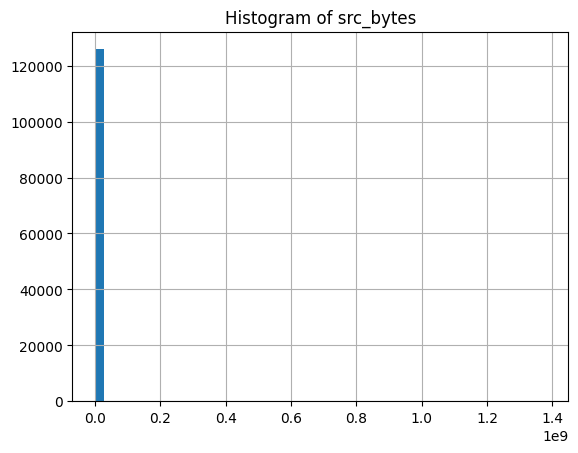

'Histograms depend on bin size.\n\nVery difficult to detect rare anomalies.\n\nstopped using and not smooth.'

In [9]:
# Histograms & Limitations
# Histogram
import matplotlib.pyplot as plt

train["src_bytes"].hist(bins=50)
plt.title("Histogram of src_bytes")
plt.show()

"""Histograms depend on bin size.

Very difficult to detect rare anomalies.

stopped using and not smooth."""

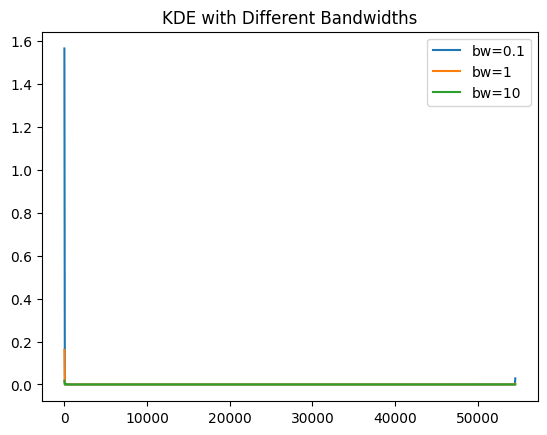

'Bandwidth Explanation: -\n\nSmall bandwidth is very spiky curve (overfitting)\n\nLarge bandwidth itooverly smooth (underfitting)\n\nMedium bandwidth to best anomaly detection'

In [10]:
# Kernel Density Estimation (KDE)
# KDE Implementation
from sklearn.neighbors import KernelDensity
import numpy as np

data = train["src_bytes"].values.reshape(-1,1)

# Try different bandwidths
for bw in [0.1, 1, 10]:
    kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(data)
    x = np.linspace(0, np.percentile(data, 99), 1000).reshape(-1,1)
    log_density = kde.score_samples(x)
    plt.plot(x, np.exp(log_density), label=f"bw={bw}")

plt.legend()
plt.title("KDE with Different Bandwidths")
plt.show()

"""Bandwidth Explanation: -

Small bandwidth is very spiky curve (overfitting)

Large bandwidth itooverly smooth (underfitting)

Medium bandwidth to best anomaly detection"""

In [ ]:
# Univariate KDE Anomaly Detection
# Detecting Anomalies
kde = KernelDensity(bandwidth=1).fit(data)
scores = kde.score_samples(data)

threshold = np.percentile(scores, 5)  # bottom 5% is = anomalies
anomalies = data[scores < threshold]

plt.hist(data, bins=50, density=True)
plt.scatter(anomalies, np.zeros_like(anomalies), color="red")
plt.title("KDE Anomaly Detection where Red = Anomalies")
plt.show()

In [ ]:
# KDE on NSL-KDD HTTP Attacks
# Filtering HTTP Attacks
http_data = train[train["service"]=="http"]
http_bytes = http_data["src_bytes"].values.reshape(-1,1)

kde = KernelDensity(bandwidth=1).fit(http_bytes)
scores = kde.score_samples(http_bytes)
threshold = np.percentile(scores, 5)

http_anomalies = http_bytes[scores < threshold]

plt.hist(http_bytes, bins=50, density=True)
plt.scatter(http_anomalies, np.zeros_like(http_anomalies), color="red")
plt.title("HTTP Attack Anomalies using KDE")
plt.show()

In [ ]:
# One-Class SVM
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel="rbf", gamma=0.001, nu=0.05)
svm.fit(data)

pred = svm.predict(data)
anomalies_svm = data[pred == -1]

plt.hist(data, bins=50, density=True)
plt.scatter(anomalies_svm, np.zeros_like(anomalies_svm), color="red")
plt.title("One-Class SVM Anomalies")
plt.show()

In [ ]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
pred = iso.fit_predict(data)

anomalies_iso = data[pred == -1]

plt.hist(data, bins=50, density=True)
plt.scatter(anomalies_iso, np.zeros_like(anomalies_iso), color="red")
plt.title("Isolation Forest Anomalies")
plt.show()

Comparison Discussion
KDE:
•	Statistical method is good for density-based anomaly detection
•	Is very sensitive to bandwidth choice
One-Class SVM:
•	Learns the boundary around normal data
•	is sensitive to parameters like gamma, nu
Isolation Forest:
•	Best for large datasets
•	Fast and effective for high-dimensional anomalies

Isolation Forest generally performed best on NSL-KDD due to scalability and fewer parameter tuning issues.
